In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow

: 

In [ ]:
def increase_brightness(img, value=20):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    limLow = 155 - value #200
    limHigh = 205 - value #200

    bright_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    rows = img.shape[0]
    cols=img.shape[1]
    brightness = np.sum(bright_img) / (255 * cols * rows)
    print(brightness)
    if (brightness <0.28 or brightness>0.33): #while 0.4
        v[v <= limLow] += value
        v[v >= limHigh] -= value
        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        bright_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        brightness = np.sum(bright_img) / (255 * cols * rows)
        print(brightness)

    return img

In [ ]:
#Partie test des paramètres
def le_hough(nb,minV=10,maxV=60):
    imgNum = 0
    blur=5
    dp=1
    minDist=295 #270
    p1 = 30    #55 #100
    p2= 7  #7   #5
    minR=10
    maxR=60

    img = cv2.imread('drive/MyDrive/Colab Notebooks/pge/PGE_images/'+str(nb)+'.jpg')

    img = img[430:img.shape[0]-450, 80:img.shape[1]-200]   #430 400
    imgOrg= img.copy()
    #increase brightness
    #img = increase_brightness(img)
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #adaptive threshold
    imgGray = cv2.medianBlur(imgGray,blur)
    imgGray = cv2.adaptiveThreshold(imgGray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,41,3) #41
    imgGray = cv2.medianBlur(imgGray,blur)
    imgGray[imgGray ==1] = 255
    #kernel = np.ones((7,7),np.uint8)
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(9,9))
    imgGray = cv2.morphologyEx(imgGray, cv2.MORPH_OPEN, kernel)

    circles = cv2.HoughCircles(imgGray,cv2.HOUGH_GRADIENT,dp,minDist,
                                param1=p1,param2=p2,minRadius=minR,maxRadius=maxR)
    imgCanny=cv2.Canny(imgGray,p1//2,p1)
    nb_c =0
    if( not (circles is None)):
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            if i[2] >= minV and i[2] <= maxV:
                cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),10)
                cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
                nb_c+=1

    show = np.concatenate((
        np.concatenate((imgOrg,img),axis=1),
        cv2.cvtColor(np.concatenate((imgGray,imgCanny),axis=1),cv2.COLOR_GRAY2BGR)
        ),axis=0)
    return (show,nb_c)

In [ ]:
nb='25'
#pitit pixel
(show,nb_c) = le_hough(nb,14,19)
cv2_imshow(cv2.resize( show, (960,1280) ))

In [ ]:
nb='25'
#petit pixel
(show,nb_c) = le_hough(nb,21,27) #21 27
print(nb_c)
cv2_imshow(cv2.resize( show, (960,1280) ))

In [ ]:
nb='18'
#moyen pixel
show = le_hough(nb,34,42)
cv2_imshow(cv2.resize( show, (960,1280) ))

In [ ]:
nb='25'
#grand pixel
show = le_hough(nb,52,58)
cv2_imshow(cv2.resize( show, (960,1280) ))

In [ ]:
#Gros trou  : 110 pixels ~~
#moyen trou : 76 pixels ~~
#petit trou : 48 pixels ~~
#pitit trou : 33 pixels ~~

#augmenter luminosité moyenne
img = cv2.imread('drive/MyDrive/Colab Notebooks/pge/PGE_images/32.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cols, rows = img.shape
brightness = numpy.sum(img) / (255 * cols * rows)
print(brightness)

0.2831780440113217


In [ ]:
img = cv2.imread('drive/MyDrive/Colab Notebooks/pge/PGE_images/32.jpg')
bright_img = increase_brightness(img)
bright_img = cv2.cvtColor(bright_img,cv2.COLOR_BGR2GRAY)
brightness = numpy.sum(bright_img) / (255 * cols * rows)
print(brightness)
cv2_imshow(bright_img)

In [ ]:
imgCanny=cv2.Canny(bright_img,p1//2,p1)
cv2_imshow(imgCanny)

In [ ]:
img = cv2.imread('drive/MyDrive/Colab Notebooks/pge/PGE_images/32.jpg')
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2_imshow(img[430:img.shape[0]-377, 0:img.shape[1]])

In [ ]:
minimum_brightness = 0.50
ratio = brightness / minimum_brightness
if ratio >= 1:
    print("Image already bright enough")

# Otherwise, adjust brightness to get the target brightness
bright_img = cv2.convertScaleAbs(img, alpha = 1, beta = 255 * (minimum_brightness - brightness))
cv2_imshow(bright_img)

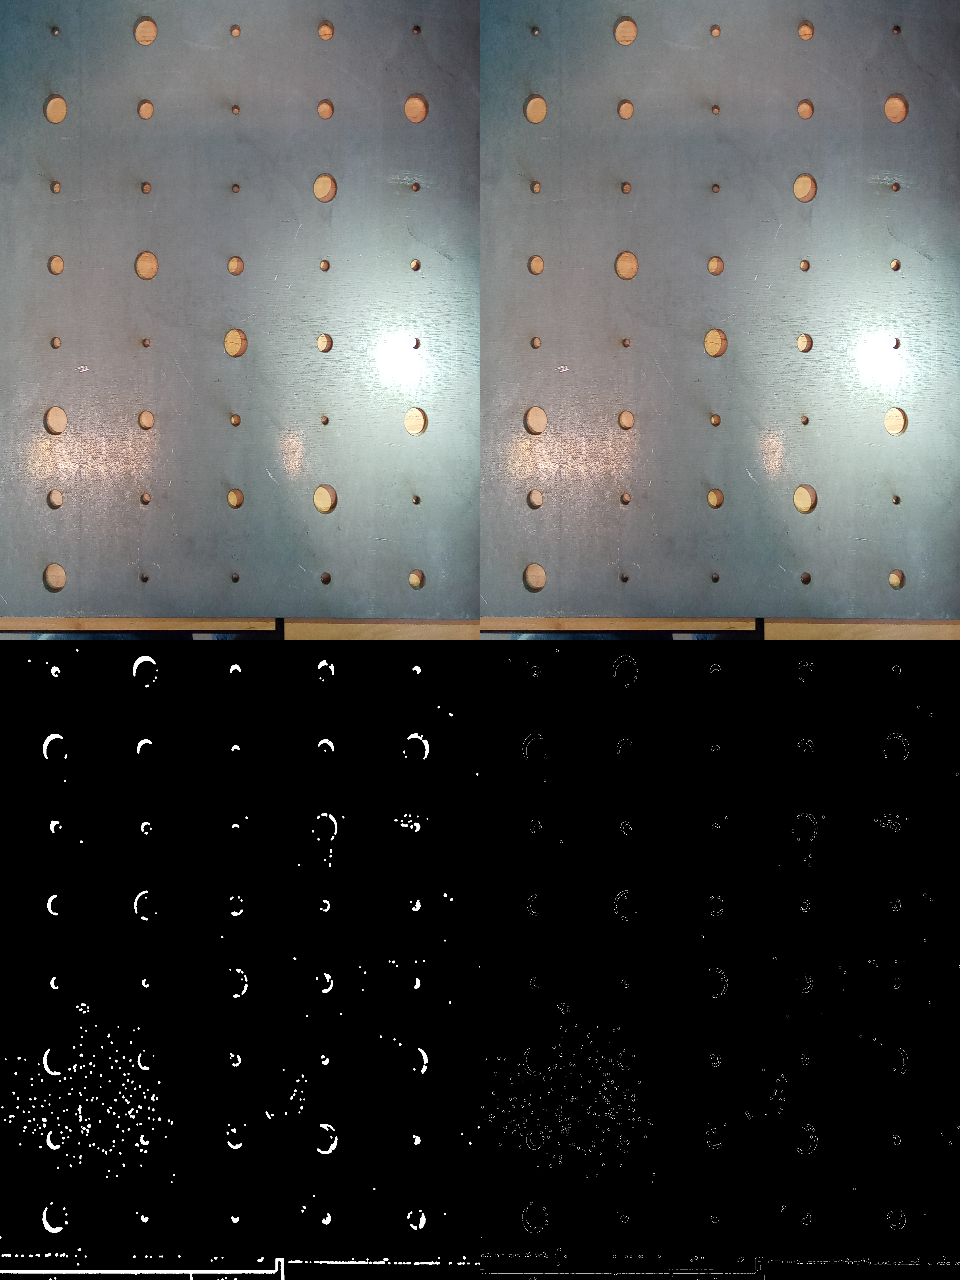

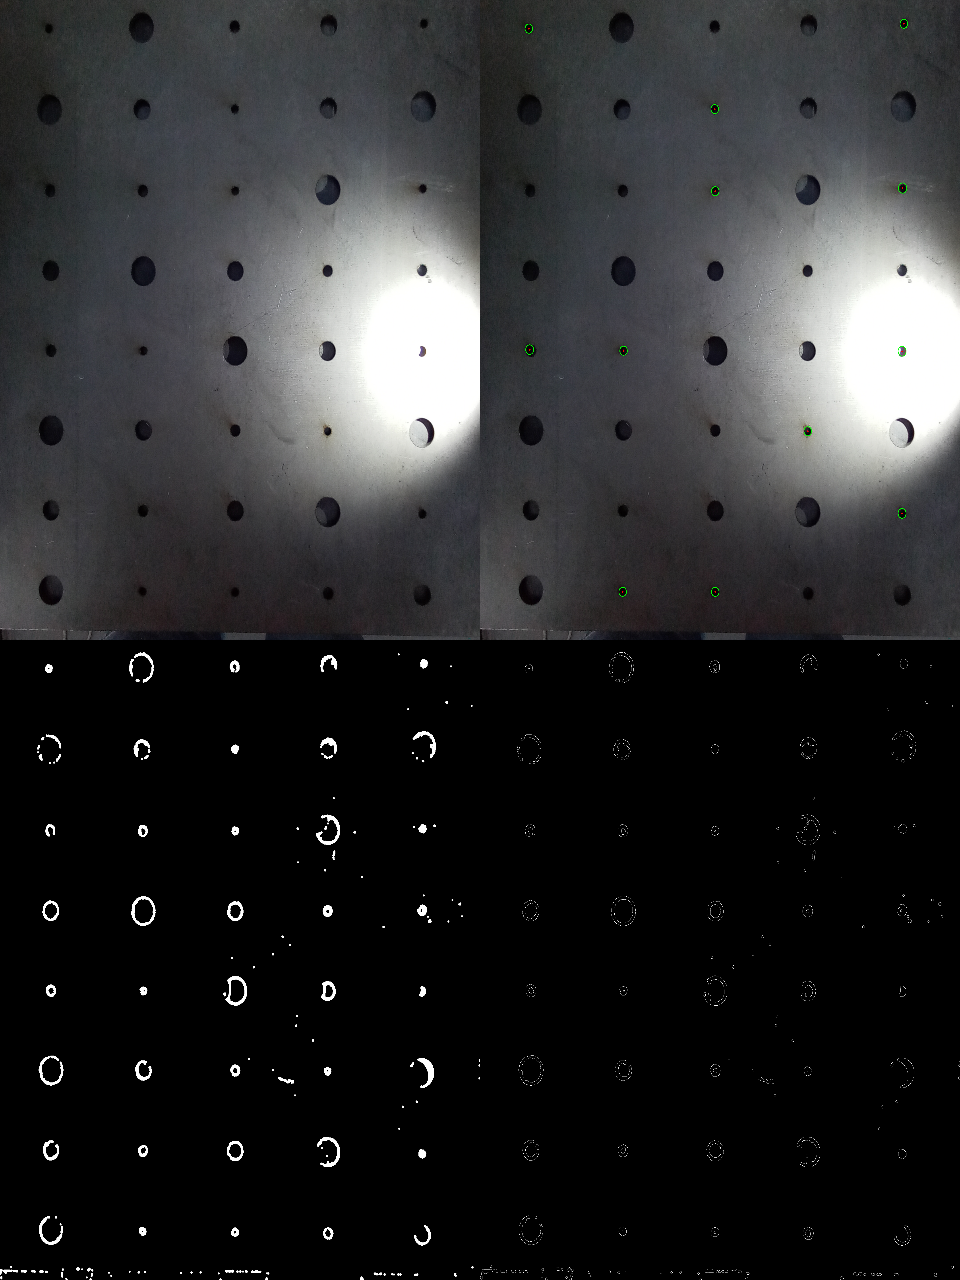

Pitit Pixel :
Moyenne =  8.078947368421053   Minimum =  0   Maximum =  12


In [ ]:
#### Vrai stats !! ###
from statistics import mean
listee = []
for i in range (1,39):
    #pitit pixel
    (show,nb_c) = le_hough(i,14,19)
    listee.append(nb_c)
    if nb_c==0 or nb_c==12:
        cv2_imshow(cv2.resize( show, (960,1280) ))
print("Pitit Pixel :\nMoyenne = ",mean(listee),"  Minimum = ",min(listee),"  Maximum = ",max(listee))

In [ ]:
#### Vrai stats !! ###
from statistics import mean
listee = []
for i in range (1,39):
    #petit pixel
    (show,nb_c) = le_hough(i,21,27) #21 27
    listee.append(nb_c)

print("Petit Pixel :\nMoyenne = ",mean(listee),"  Minimum = ",min(listee),"  Maximum = ",max(listee))

Petit Pixel :
Moyenne =  6.631578947368421   Minimum =  2   Maximum =  12


In [ ]:
#### Vrai stats !! ###
from statistics import mean
listee = []
for i in range (1,39):
    #moyen pixel
    (show,nb_c) = le_hough(i,34,42)
    listee.append(nb_c)

print("Moyen Pixel :\nMoyenne = ",mean(listee),"  Minimum = ",min(listee),"  Maximum = ",max(listee))

Moyen Pixel :
Moyenne =  8.631578947368421   Minimum =  5   Maximum =  11


In [ ]:
#### Vrai stats !! ###
from statistics import mean
listee = []
for i in range (1,39):
    #Grand pixel
    (show,nb_c) = le_hough(i,52,58)
    listee.append(nb_c)

print("Grand Pixel :\nMoyenne = ",mean(listee),"  Minimum = ",min(listee),"  Maximum = ",max(listee))

Grand Pixel :
Moyenne =  9.052631578947368   Minimum =  5   Maximum =  11


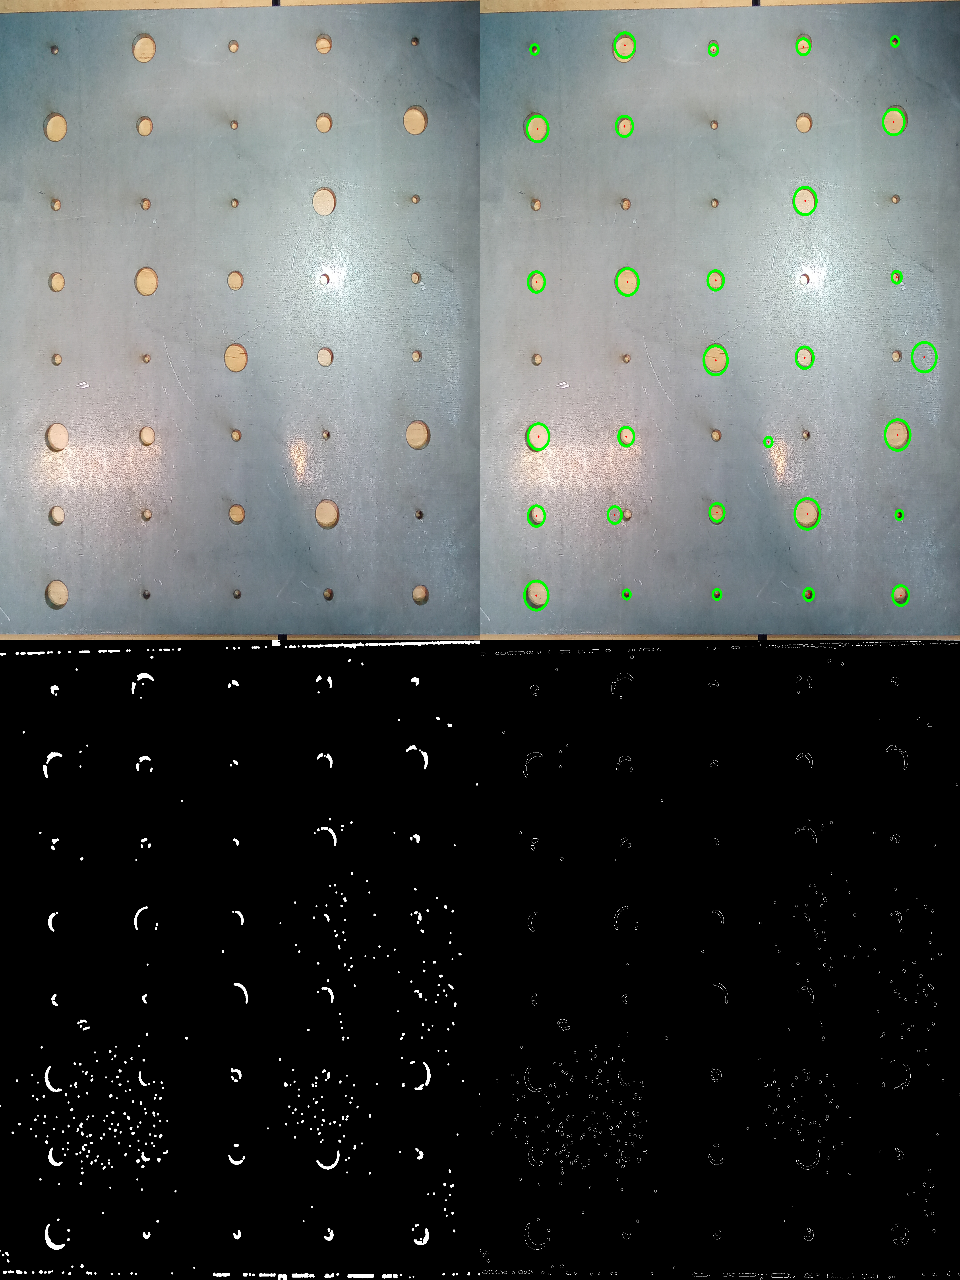

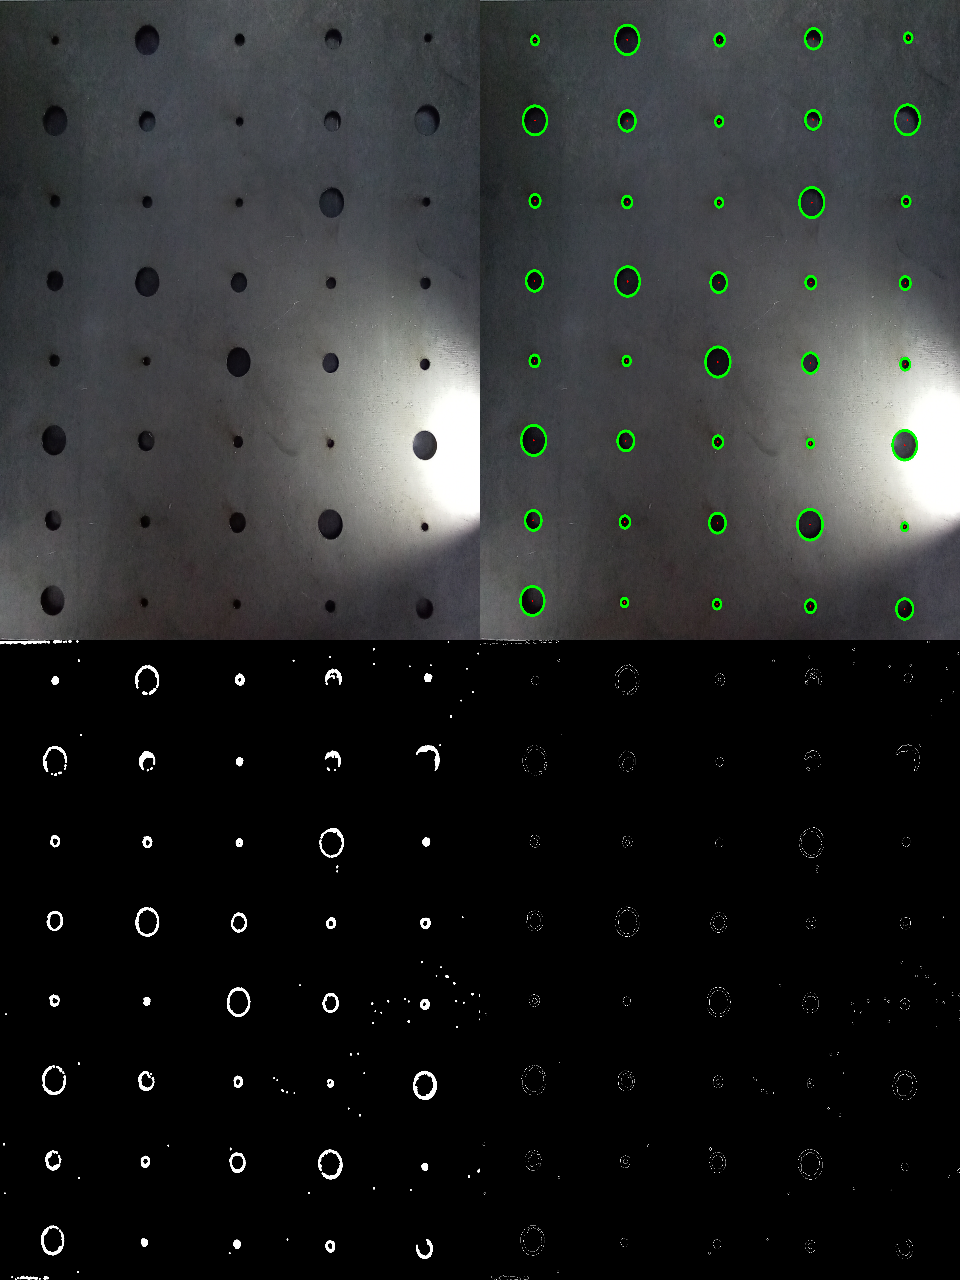

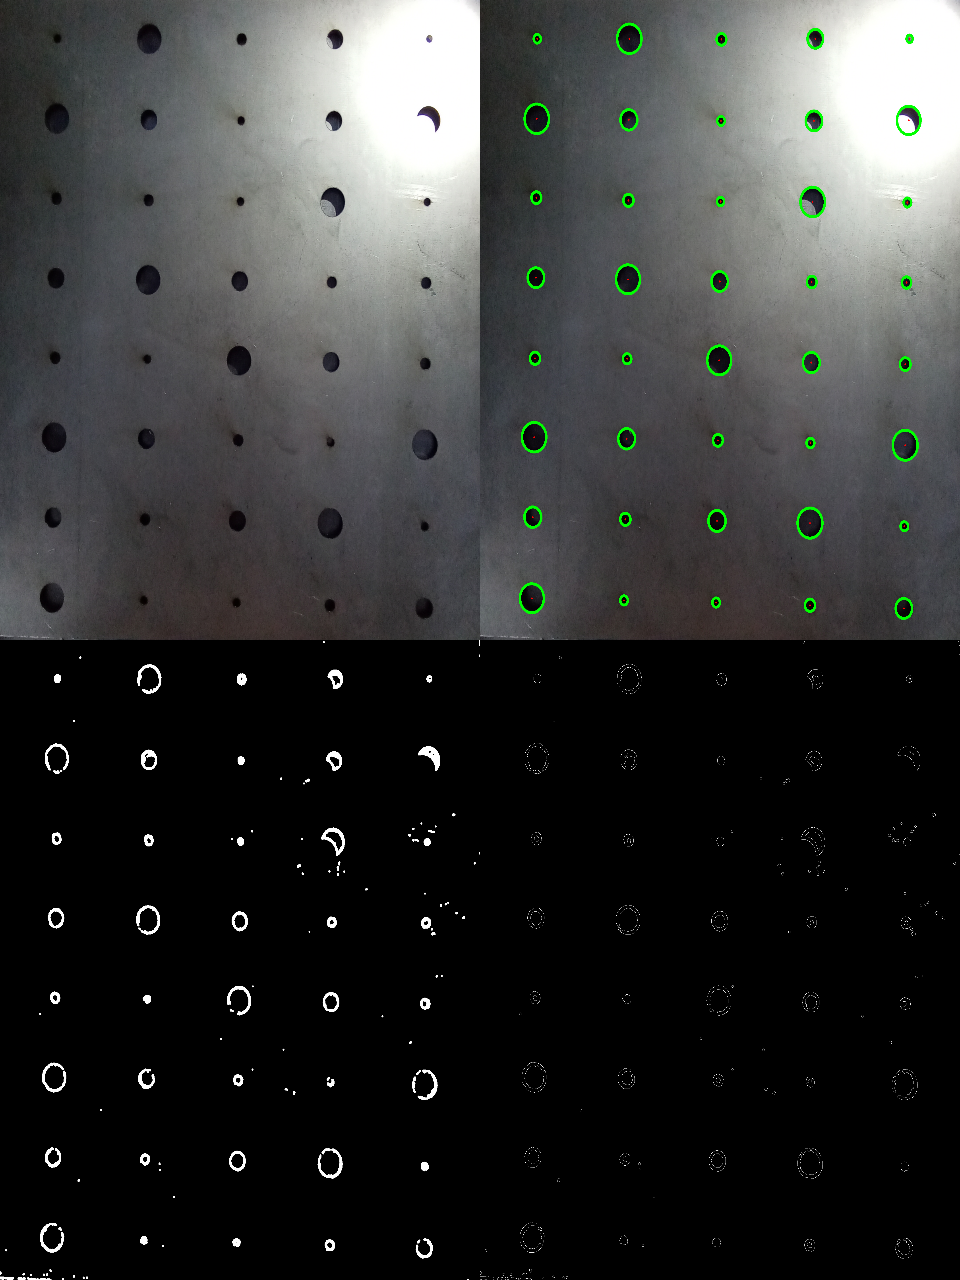

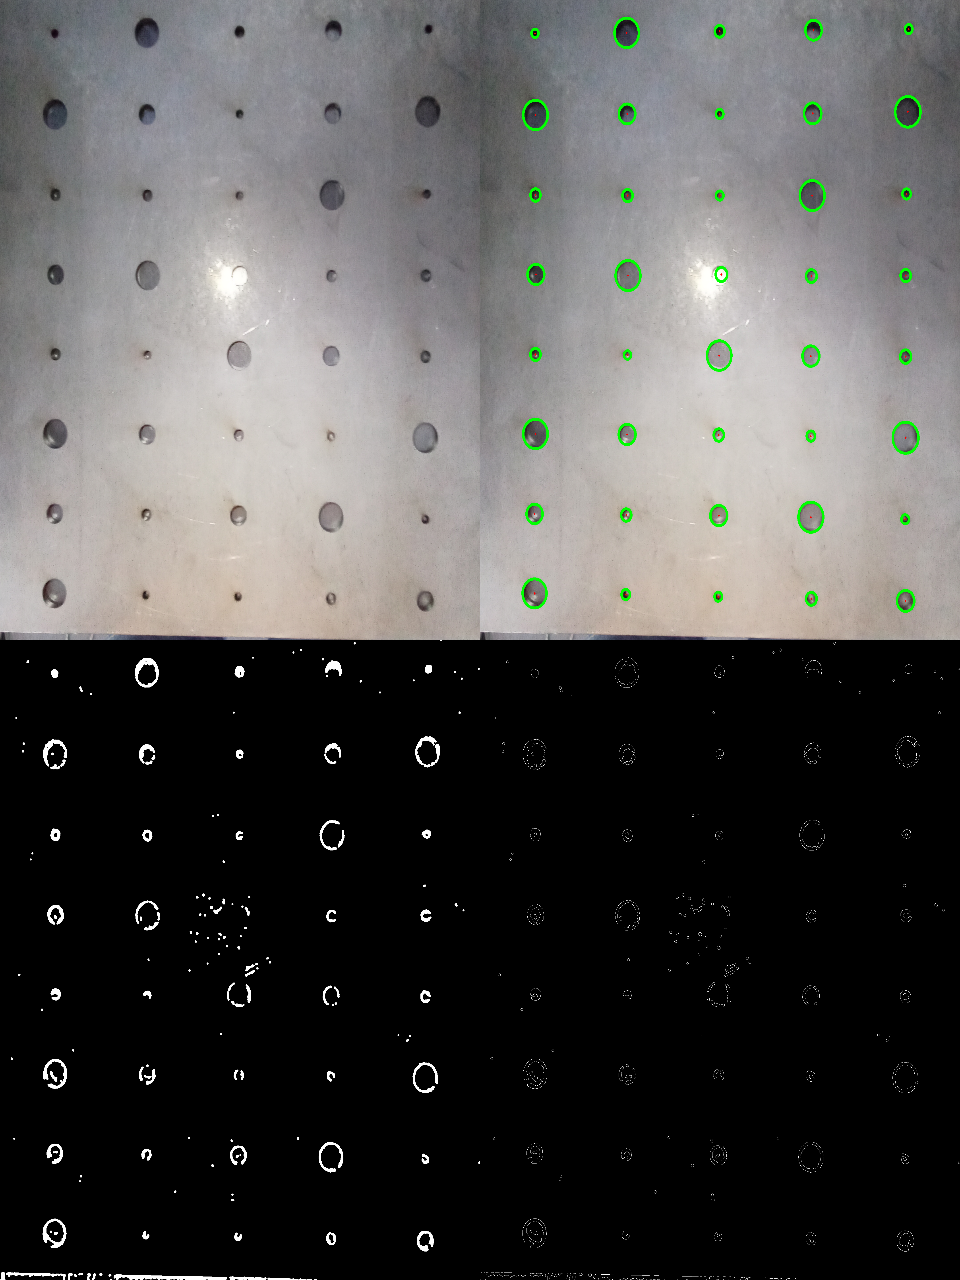

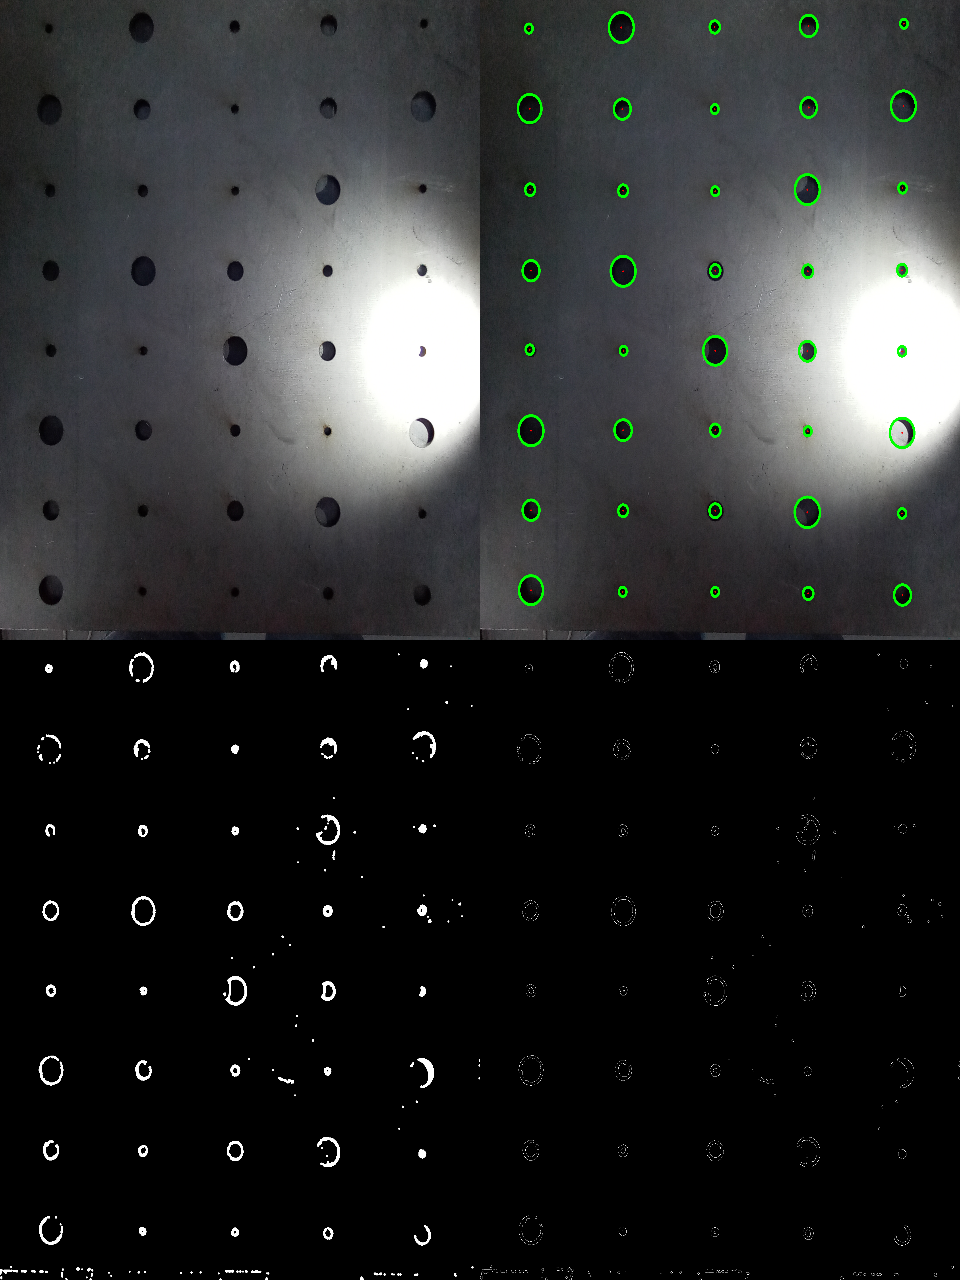

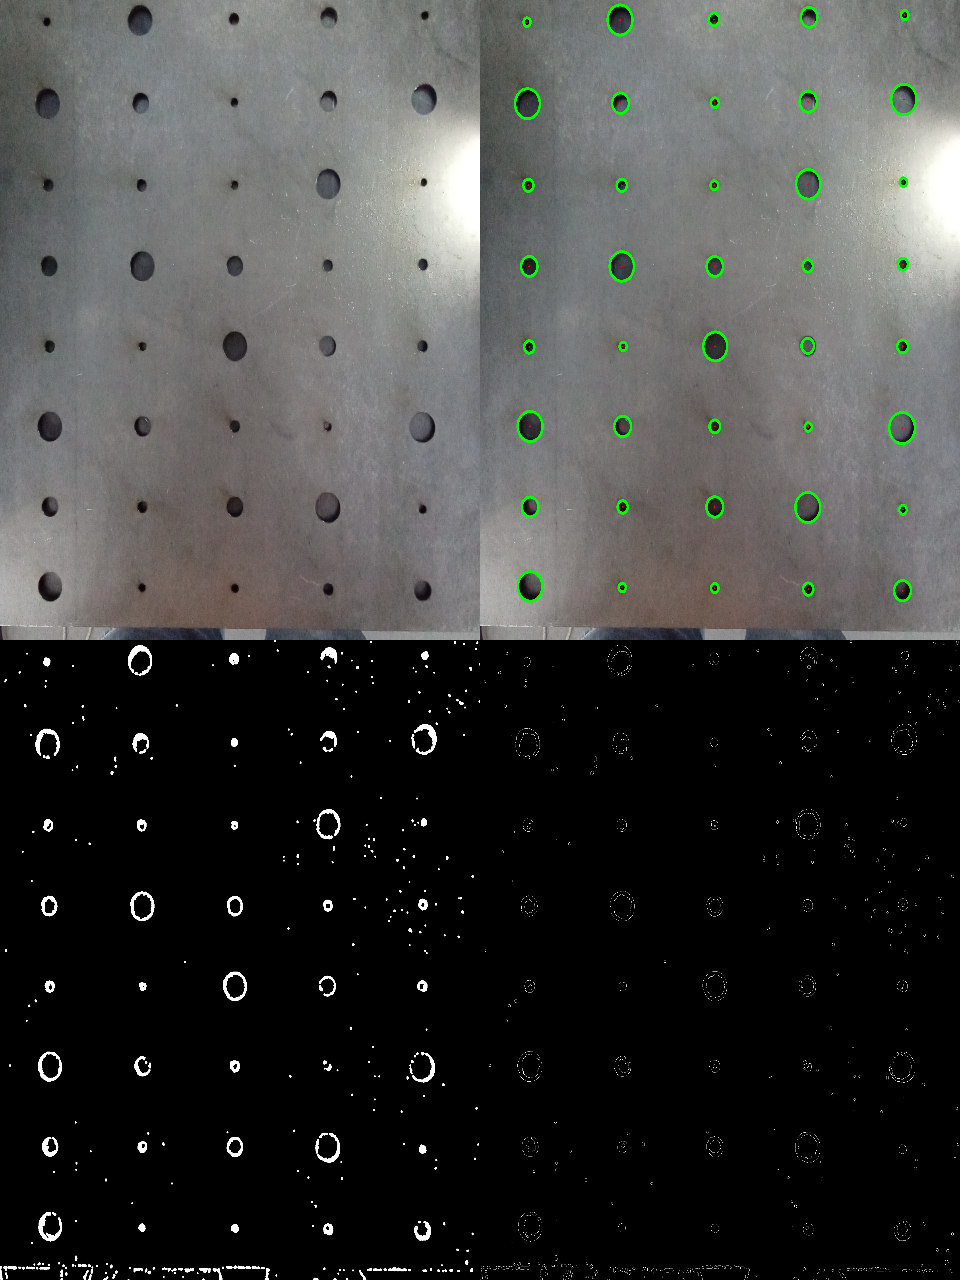

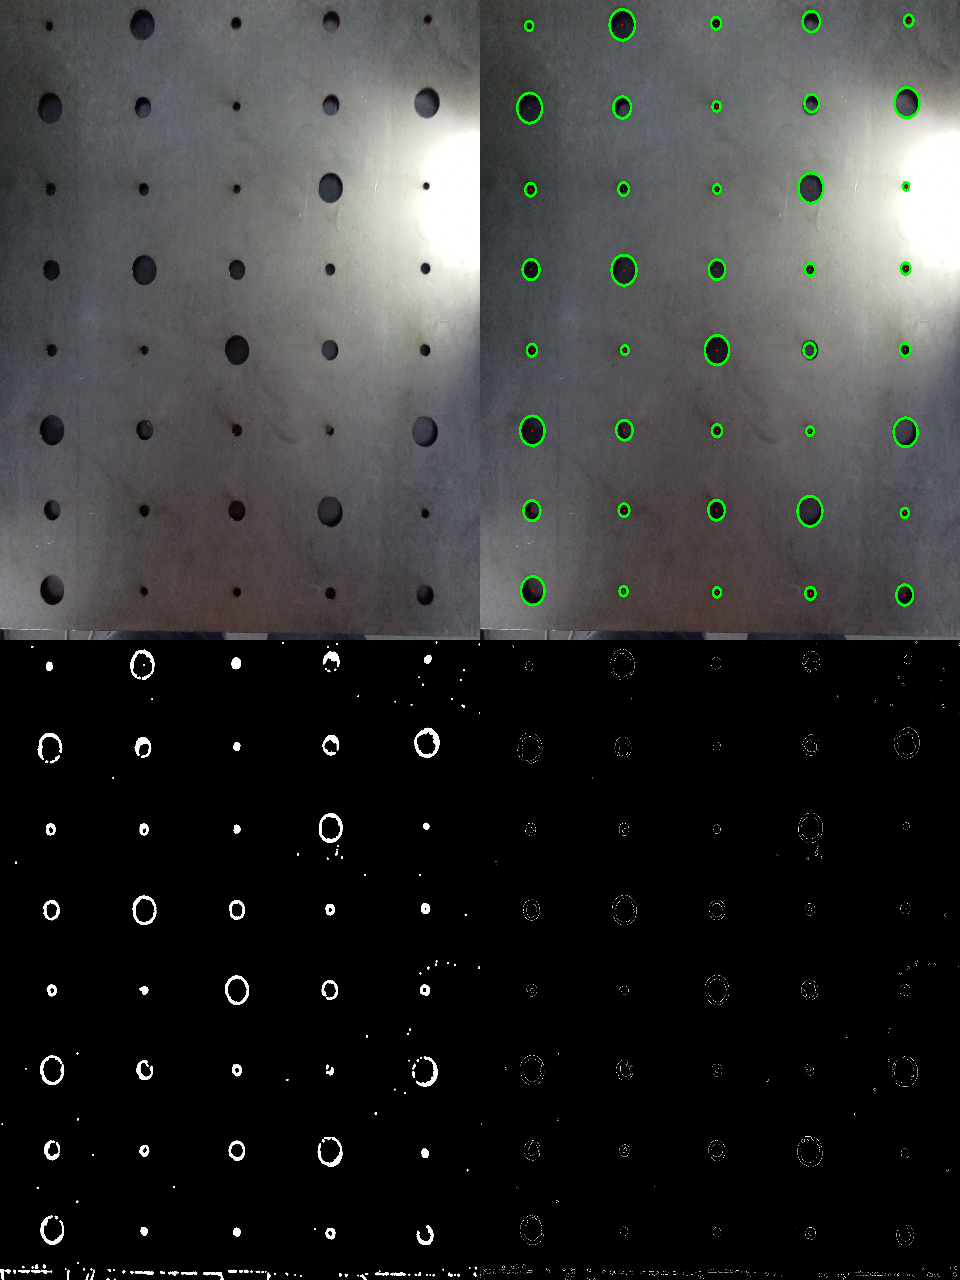

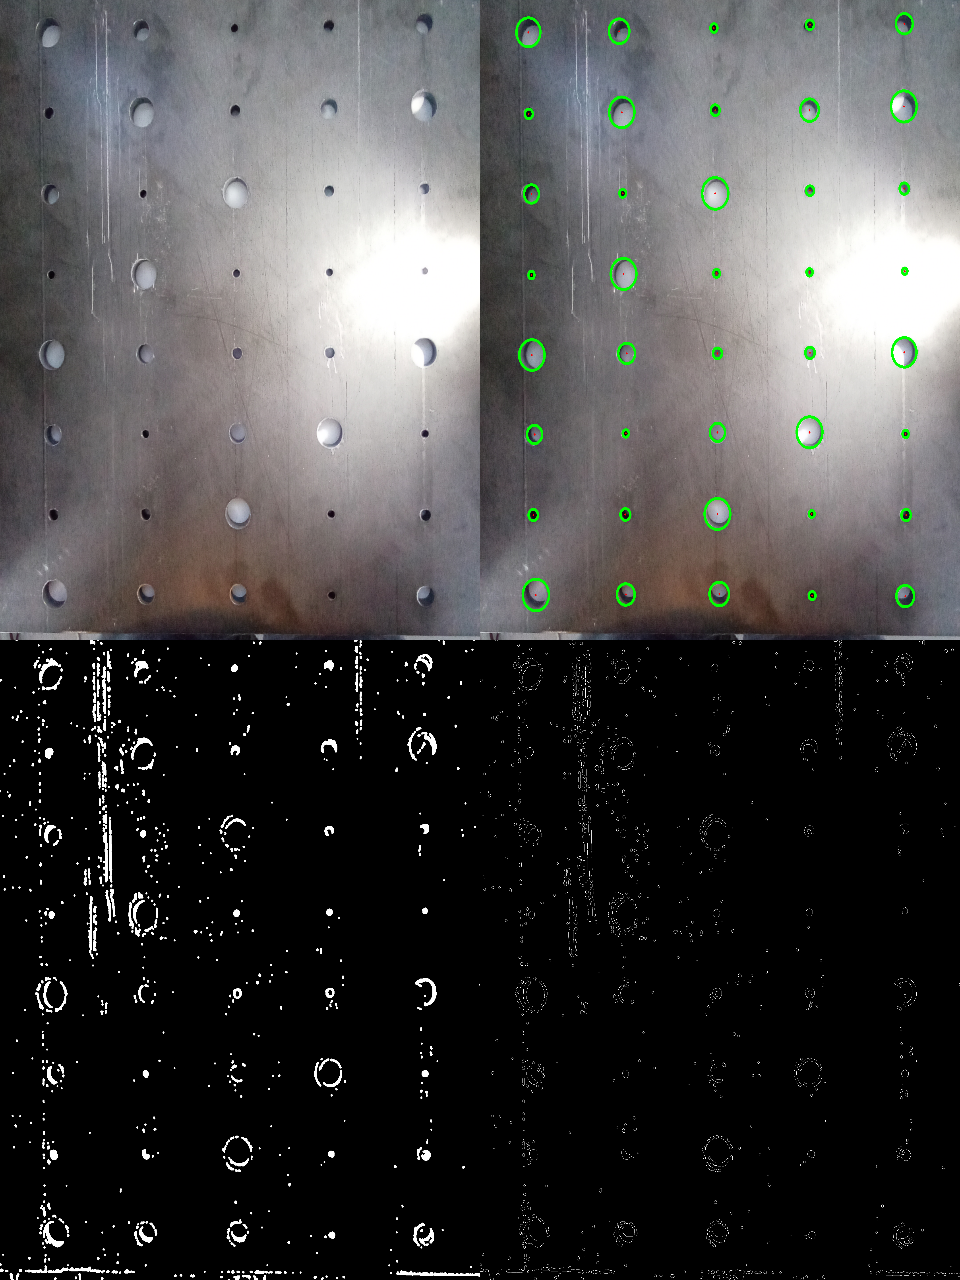

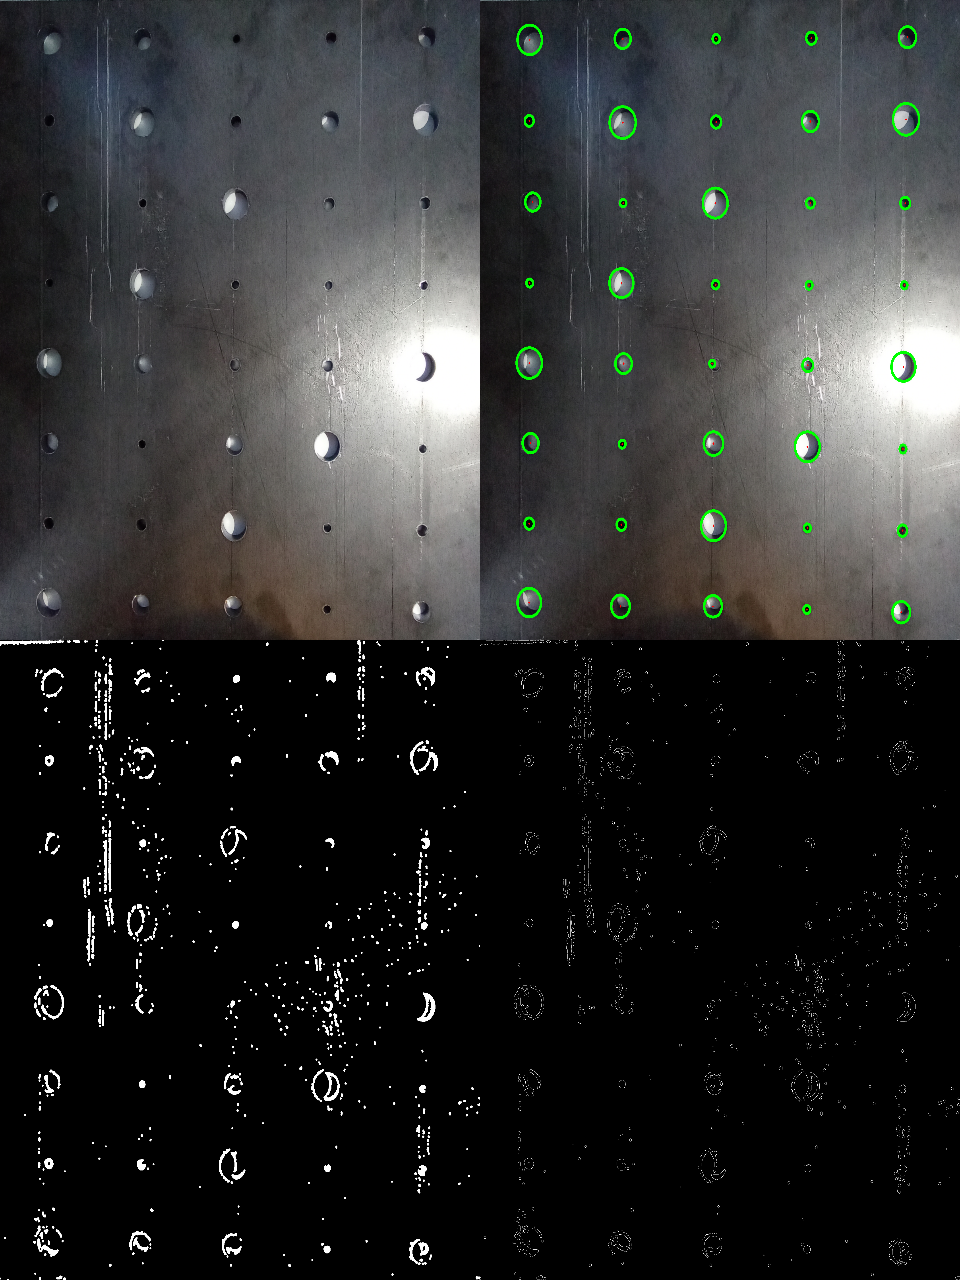

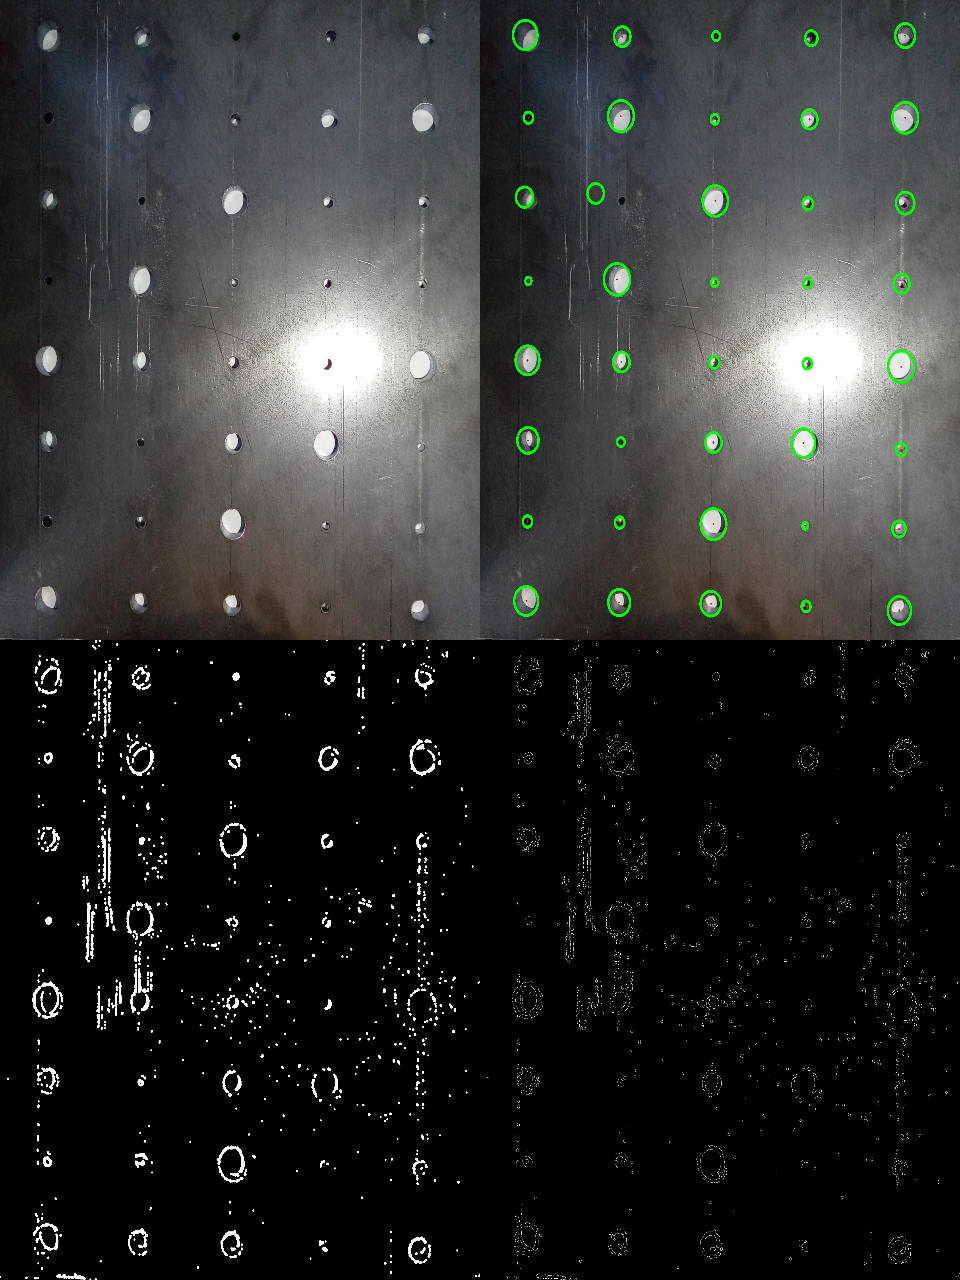

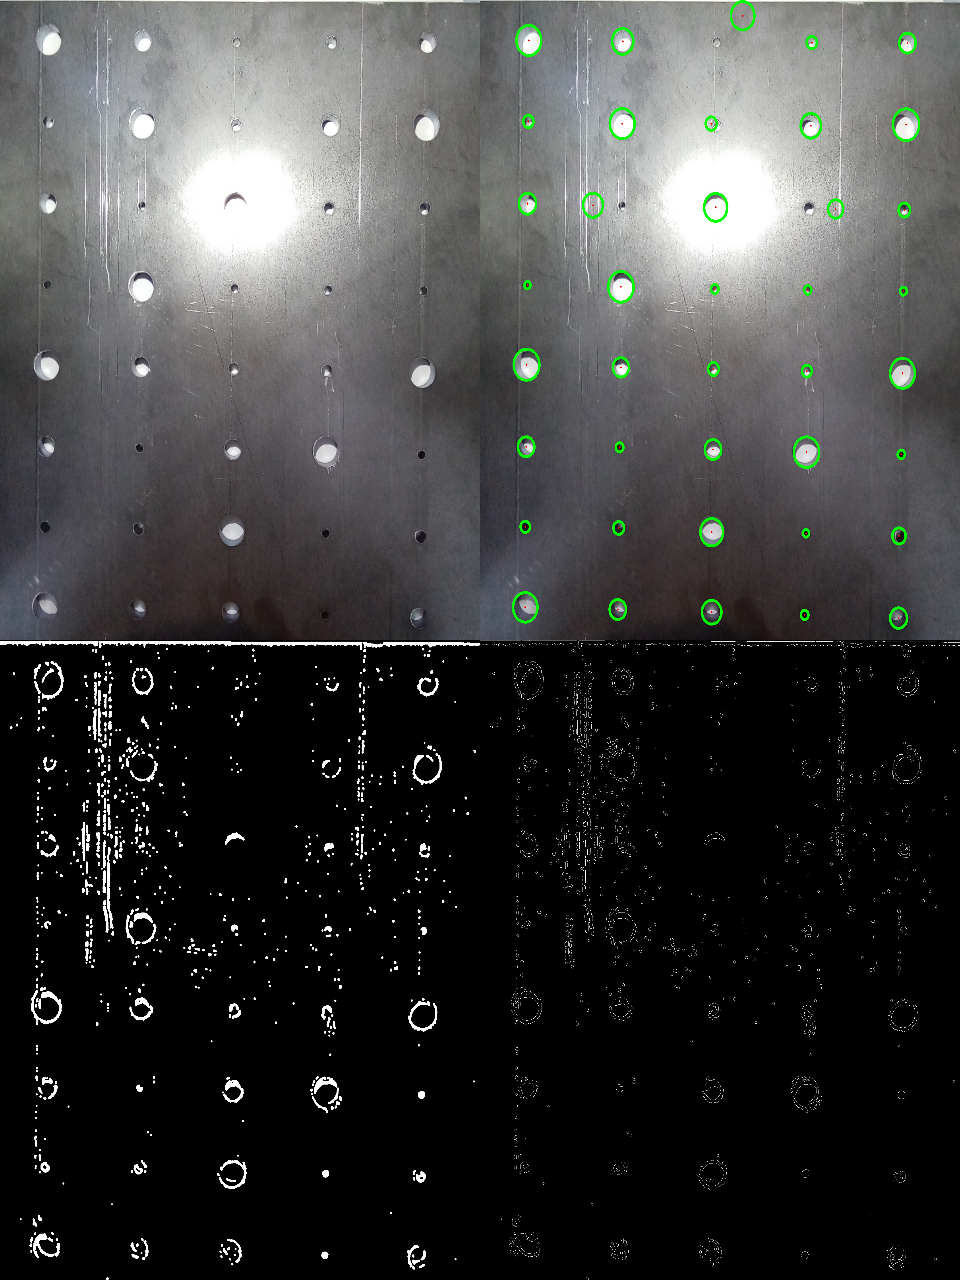

Trouve les trou :
Moyenne =  37.18421052631579   Minimum =  30   Maximum =  40


In [ ]:
#### Vrai stats !! ###
from statistics import mean
listee = []
for i in range (1,39):
    #Tout les trou
    (show,nb_c) = le_hough(i,10,60)
    listee.append(nb_c)
    if nb_c==30 or nb_c==40:
        cv2_imshow(cv2.resize( show, (960,1280) ))
print("Trouve les trou :\nMoyenne = ",mean(listee),"  Minimum = ",min(listee),"  Maximum = ",max(listee))